In [1]:
import numpy as np
import pandas as pd
import os, re, shutil
import ast
import matplotlib.pyplot as plt

In [2]:
import sys 
sys.path.append('Shell_Code_Modified/')
import Farm_Evaluator_Vec

In [3]:
#initialize all the variables
# wind farm size, cells
cand_per_run=100

folderName="Ver2_N/naveen_data/"
ExtName= (folderName+"/init_data")

best_layout_prefix="init_"
default_location='../data/Shell_Hackathon_Dataset/'
Wind_data_year='avg'

output_folder_location=folderName+"/summary"
if not os.path.exists(output_folder_location):
    os.makedirs(output_folder_location)
### Read Experiment Spec
fname=folderName+"/"+'exp_specs.txt'
file = open(fname, 'r')
f = file.read()
file.close()
paraDic = ast.literal_eval(f)
cols_cells = int(paraDic['cols_cells'])  # number of cells each row
rows_cells = int(paraDic['rows_cells'])  # number of cells each column
cell_width = int(paraDic['cell_width'])
wt_N=int(paraDic['wt_N'])

In [4]:
def convert_xy_pos(pop,rows,cell_width,N_tur):
    xy_position = np.zeros((N_tur,2), dtype=np.float32)
    curr_tur=0
    for ind in range(rows * rows):
        if pop[ind] == 1:
            r_i = np.floor(ind / rows)
            c_i = np.floor(ind - r_i * rows)
            xy_position[curr_tur,0] = c_i * cell_width + cell_width/2
            xy_position[curr_tur,1] = r_i * cell_width + cell_width/2
            curr_tur +=1
    return (xy_position)
            

['init_0.dat']
Processing File:init_0.dat
(100, 6400)
517.4966725158691


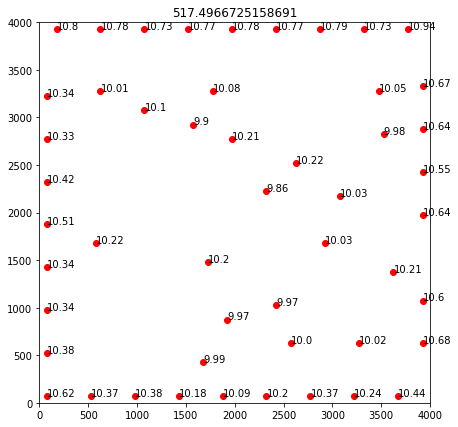

519.462680053711


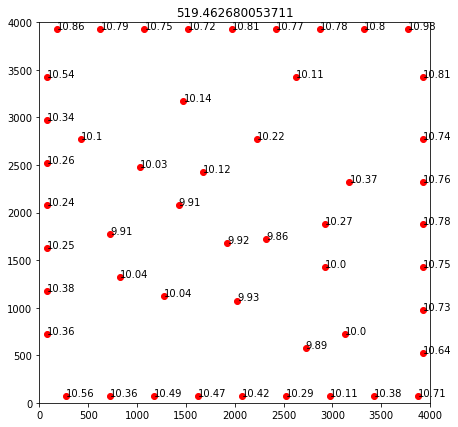

517.3846929931641


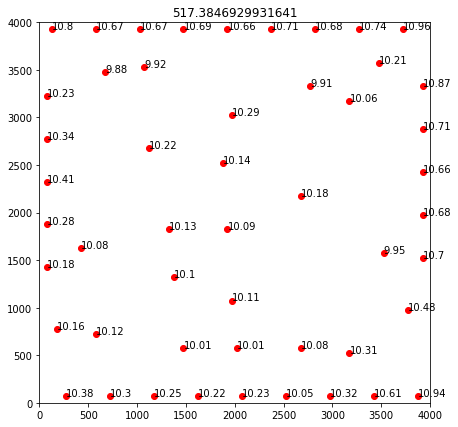

519.2347778320312


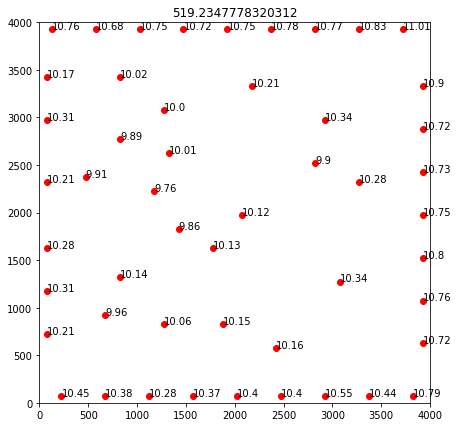

518.962331085205


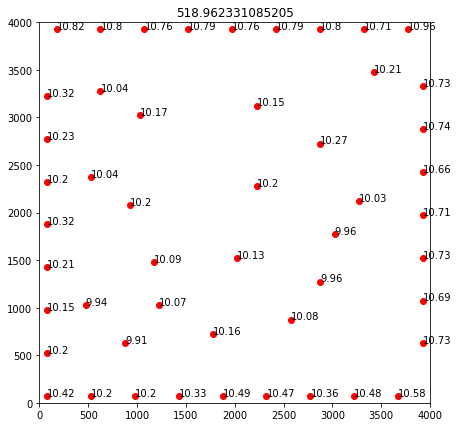

519.1222970581055


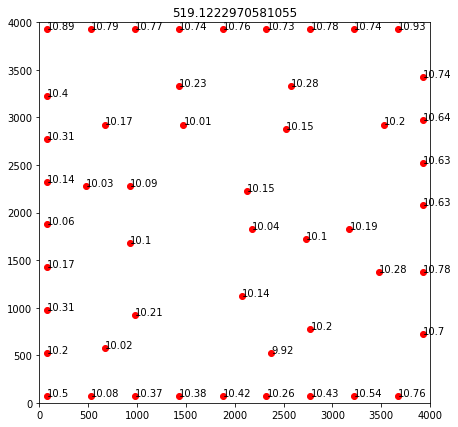

518.7763668823242


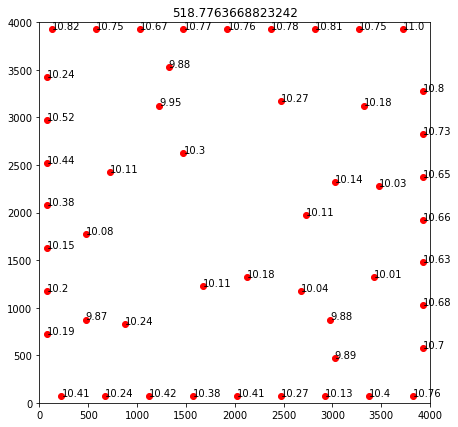

517.2462808227539


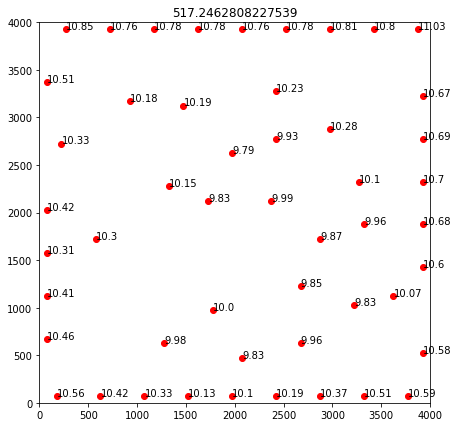

519.3417114257812


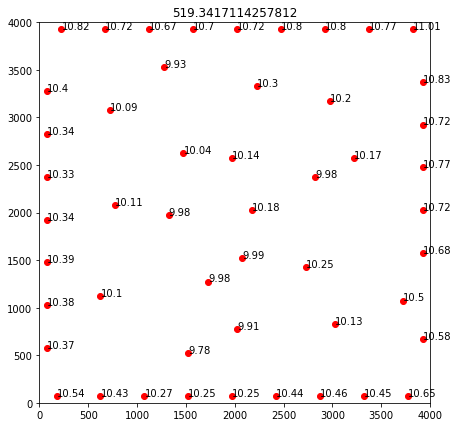

517.7565545654297


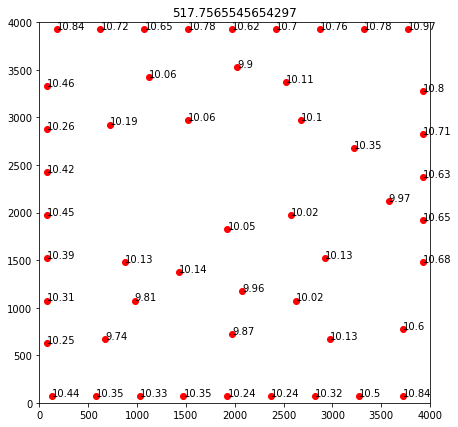

518.9182543945312


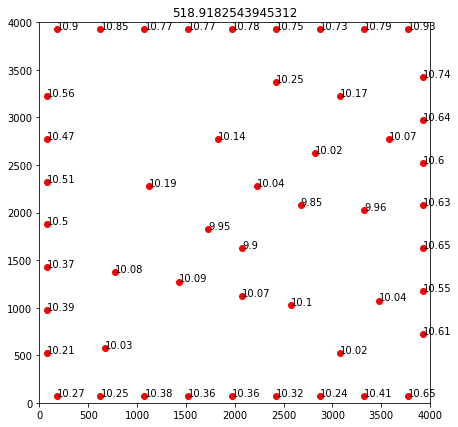

518.0986083984375


KeyboardInterrupt: 

In [5]:

# Create regex with prefix + number + extension.
fileRegex = re.compile(r'(%s)\d.dat' % best_layout_prefix)
    
# Make a list to contain the file with prefix.
fileNames = []
for filename in os.listdir(ExtName):
    #print(filename)
    if re.search(fileRegex, filename):
        fileNames.append(filename)
# Make sure the fileName in the list have a right order.
print(fileNames)
run_results_dict={}

result_summary_df=pd.DataFrame() #dataframe to analyze results
result_list_all={}  #complete summary with xy coordinates position.
dict_index=0

result_layout_all=None
best_eta_layout_all=None

for curr_run_filename in fileNames:
    print("Processing File:"+curr_run_filename)
    filePath=ExtName+"/"+curr_run_filename
    result_layout=np.genfromtxt(filePath, delimiter="  ", dtype=np.int32)
#     print(result_layout_all.shape)
    print(result_layout.shape)

    num_layout=result_layout.shape[0]
    
    for curr_layout in range(num_layout):
        tur_xy_coord=convert_xy_pos(result_layout[curr_layout],rows_cells,cell_width,wt_N)

        #         print(tur_xy_coord.shape)
        #for curr_wind_inst in Wind_data_year:
        wind_inst_freq_file=default_location+"Wind_Data/wind_data_"+(Wind_data_year)+".csv"
        total_energy, turbine_power=Farm_Evaluator_Vec.get_AEP_results(default_location=default_location,turb_coords=tur_xy_coord,wind_inst_freq_file=wind_inst_freq_file)
        print(total_energy)
        #    curr_result_xy=pd.DataFrame(tur_xy_coord)
        #    curr_result_xy.columns=["x","y"]
        #    curr_result_xy.to_csv(output_folder_location+"/best"+str(curr_layout)+".csv",index=False)
            #             curr_run_results[str(curr_wind_inst)]=total_energy
# #             print("Year: "+str(curr_wind_inst)+" Energy: "+ str(total_energy))
# #         print(curr_run_results)
#         curr_run_results['dict_index']=dict_index
# #           print(curr_run_results)
# #         print(result_summary_df)
        plt.figure(figsize=(7,7))
        plt.scatter(tur_xy_coord[:,0], tur_xy_coord[:,1],marker='o', color='r', label='Square')
        plt.xlim(0,4000)
        plt.ylim(0,4000)
        plt.title(str(total_energy))
        for i in range(len(turbine_power)):
            txt=str(np.round(turbine_power[i],2))
            plt.annotate(txt, (tur_xy_coord[i,0],tur_xy_coord[i,1]))
        plt.show()
#         plt.savefig( oName + str(filename) + '.jpg' )
#         result_summary_df=result_summary_df.append(pd.DataFrame.from_records([curr_run_results]),ignore_index = True)
#         curr_run_results['XY_coords']=tur_xy_coord
#         result_list_all[dict_index]=curr_run_results
#         dict_index +=1


In [ ]:
#assign overall score based on year. 
result_summary_df['best_score']=(result_summary_df['2007']+result_summary_df['2008']+result_summary_df['2009']+result_summary_df['2013']+result_summary_df['2014']+result_summary_df['2015']+result_summary_df['2017'])/7
result_summary_df.sort_values(by=['best_score'],inplace=True,ascending=False)
result_summary_df['file_name']=np.arange(0,result_summary_df.shape[0])
result_summary_df.head()
#can be used to select top N (future in case needed)

In [ ]:
#write outputs
os.makedirs(output_folder_location, exist_ok=True)
outfile_index=0
for index, curr_row in result_summary_df.iterrows():
    curr_dictIndex=curr_row['dict_index']
    curr_result_xy=pd.DataFrame(result_list_all[curr_dictIndex]['XY_coords'])
    curr_result_xy.columns=["x","y"]
    curr_result_xy.to_csv(output_folder_location+"/best"+str(curr_row['file_name'])+".csv",index=False)
    #outfile_index +=1

result_summary_df.to_csv(output_folder_location+"/result_summary.csv",index=False)
print("All Files are stored at location: "+output_folder_location)